In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653251472.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of customers
i_data = pd.DataFrame()
len_ = 100

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]

i_data.head(10)

,X,Y
0,59.552929,90.303036
1,36.966803,-6.577148
2,-34.773144,-19.735652
3,-95.752420,82.852735
4,-95.934728,19.435636
5,4.064146,15.567652
6,23.964106,32.055785
7,97.314064,-30.096594
8,-53.521205,25.502172
9,42.131656,84.468800


In [6]:
# create set of candidate locations
j_data = pd.DataFrame()
len_ = 20

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]

j_data.head(10)

,X,Y
0,32.347390,-93.754034
1,-68.445353,1.833930
2,49.296640,67.154104
3,-10.128408,-47.881965
4,57.280796,-53.600833
5,-42.337491,40.697887
6,21.184709,-0.709555
7,-8.743916,-56.435056
8,78.585936,-5.675892
9,15.208381,25.194666


Text(0.5, 1.0, 'Customer and Facility Locations')

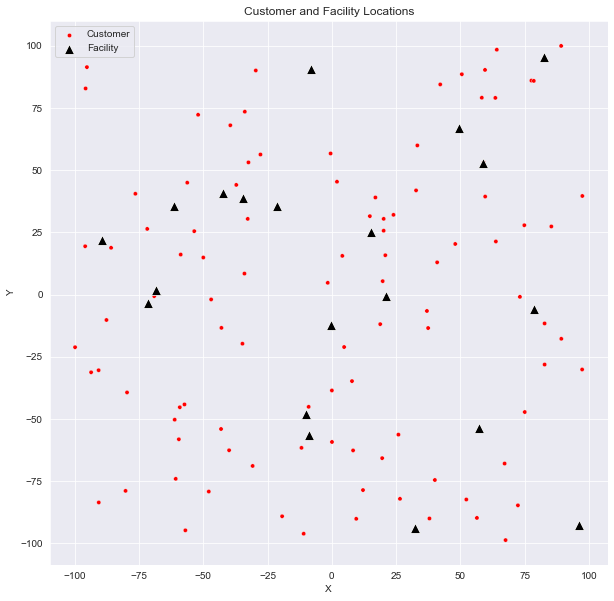

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Customer")
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^', label="Facility")
plt.legend()
plt.title('Customer and Facility Locations')

In [8]:
# create distance matrix
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = j_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_ij

array([[186.05683625, 155.59673192,  25.31925207, ...,  23.62310977,  37.25363174, 160.92861141],
       [ 87.29918935, 105.74719352,  74.75508209, ..., 111.82196141,  63.54847771, 108.45712063],
       [ 99.9194027 ,  39.98830418, 120.90309476, ..., 164.49092952, 118.65519572,  40.22745495],
       ...,
       [137.69634454,   2.54527752, 136.41310377, ..., 179.58162492, 138.81631366,   3.47228533],
       [161.65506012,  67.97888514,  77.83173079, ..., 117.12690069,  86.76800976,  73.79118022],
       [ 77.74382936,  76.70688206,  98.82556038, ..., 140.17442794,  91.80700491,  78.27085226]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
